EN2550 - Fundementals of Image Processing and Machine Vision [Assignment 3 - Object counting on a conveyer belt]

Name : R.G.S.M. RANATUNGA

Index No. : 190504H

# Connected Component Analysis

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

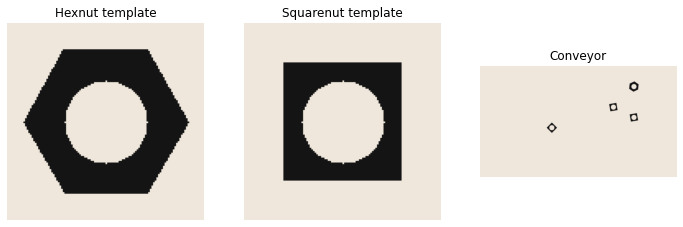

In [2]:
hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize = (12,5))
ax[0].set_title('Hexnut template')
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[0].axis('off')
ax[1].set_title('Squarenut template')
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[1].axis('off')
ax[2].set_title('Conveyor')
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
ax[2].axis('off')
plt.show()

2. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. State the threshold value (automatically) selected in the operation. Display the output images.

Threshold value of hexnut template - 8
Threshold value of squarenut template - 8
Threshold value of coveyor - 8


(-0.5, 1919.5, 1079.5, -0.5)

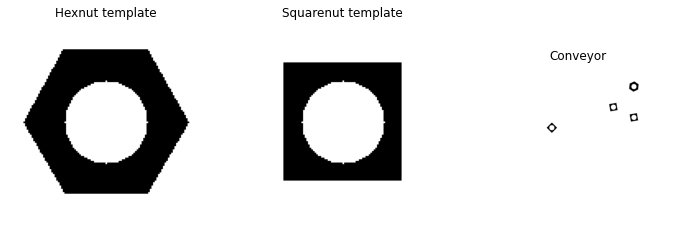

In [3]:
# Your code here.
img1 = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
img2 = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
img3 = cv.cvtColor(conveyor_f100, cv.COLOR_BGR2GRAY)

ret1,th1 = cv.threshold(img1,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print("Threshold value of hexnut template -",cv.THRESH_OTSU)
ret2,th2 = cv.threshold(img2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print("Threshold value of squarenut template -",cv.THRESH_OTSU)
ret3,th3 = cv.threshold(img3,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print("Threshold value of coveyor -",cv.THRESH_OTSU)

fig,ax = plt.subplots(1,3,figsize = (12, 5))

ax[0].set_title('Hexnut template')
ax[0].imshow(th1,'gray')
ax[0].axis('off')
ax[1].set_title('Squarenut template')
ax[1].imshow(th2,'gray')
ax[1].axis('off')
ax[2].set_title('Conveyor')
ax[2].imshow(th3,'gray')
ax[2].axis('off')

3. Carry out morphological closing to remove small holes inside the foreground. Use a 3×3 kernel.

(-0.5, 1919.5, 1079.5, -0.5)

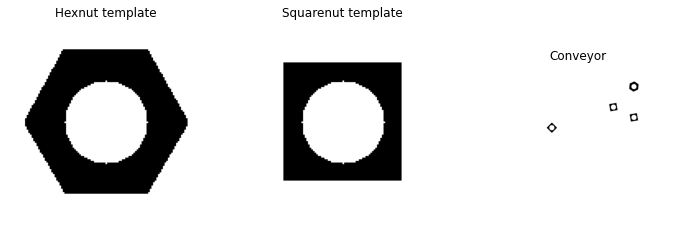

In [4]:
# Your code here.
kernel = np.ones((3,3),np.uint8)

closing1 = cv.morphologyEx(img1, cv.MORPH_CLOSE, kernel)
closing2= cv.morphologyEx(img2, cv.MORPH_CLOSE, kernel)
closing3 = cv.morphologyEx(img3, cv.MORPH_CLOSE, kernel)

fig,ax = plt.subplots(1,3,figsize = (12, 5))

ax[0].set_title('Hexnut template')
ax[0].imshow(closing1,'gray')
ax[0].axis('off')
ax[1].set_title('Squarenut template')
ax[1].imshow(closing2,'gray')
ax[1].axis('off')
ax[2].set_title('Conveyor')
ax[2].imshow(closing3,'gray')
ax[2].axis('off')

4. Connected components analysis: apply the connectedComponentsWithStats function and display the outputs as colormapped images. Answer the following questions.
- How many connected components are detected in each image?
- What are the statistics? Interpret these statistics.
- What are the centroids?

For the hexnut template, you should get the object area in pixel as approximately 4728.

Hexnut template-->
Connected components 
 3
Statistics 
 [[  10   16  101   88 4724]
 [   0    0  120  120 7715]
 [  35   35   51   51 1961]]
Centroids 
 [[59.83361558 59.22290432]
 [59.16863253 59.54257939]
 [60.         60.        ]]
Squarenut template-->
Connected components 
 3
Statistics 
 [[  24   24   72   72 3223]
 [   0    0  120  120 9216]
 [  35   35   51   51 1961]]
Centroids 
 [[59.19578033 59.19578033]
 [59.5        59.5       ]
 [60.         60.        ]]
Conveyor-->
Connected components 
 5
Statistics 
 [[      0       0    1920    1080 2059662]
 [   1454     150      92     100    4632]
 [   1259     359      82      82    3083]
 [   1459     459      82      82    3083]
 [    650     550     101     101    3140]]
Centroids 
 [[ 957.36550852  540.44326593]
 [1499.24136442  199.28454231]
 [1299.18196562  399.18196562]
 [1499.18196562  499.18196562]
 [ 700.          600.        ]]


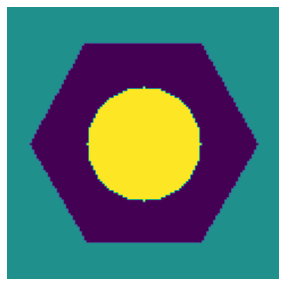

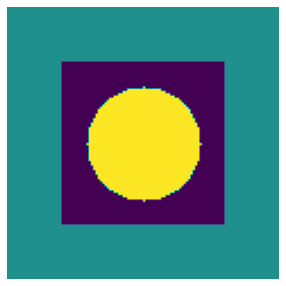

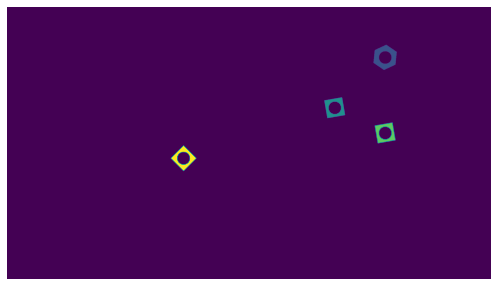

In [59]:
# Your code here.
connectivity = 4 

output1 = cv.connectedComponentsWithStats(th1, connectivity, cv.CV_32S)

(minValue, maxValue, minPosition, maxPosition) = cv.minMaxLoc(output1[1])
binaryIm1 = np.uint8(255 * (output1[1] - minValue) / (maxValue - minValue))

cv.applyColorMap(binaryIm1,cv.COLORMAP_JET)

fig,ax = plt.subplots(figsize = (12, 5))
ax.imshow(output1[1])
ax.axis('off')

print('Hexnut template-->')
n1 = output1[0]
print('Connected components','\n',n1)
stats1 = output1[2]
print('Statistics','\n',stats1)
centroids1 = output1[3]
print('Centroids','\n',centroids1)

output2 = cv.connectedComponentsWithStats(th2, connectivity, cv.CV_32S)

(minValue, maxValue, minPosition, maxPosition) = cv.minMaxLoc(output2[1])
binaryIm2 = np.uint8(255 * (output2[1] - minValue) / (maxValue - minValue))

cv.applyColorMap(binaryIm2,cv.COLORMAP_JET)

fig,ax = plt.subplots(figsize = (12, 5))
ax.imshow(output2[1])
ax.axis('off')

print('Squarenut template-->')
n2 = output2[0]
print('Connected components','\n',n2)
stats2 = output2[2]
print('Statistics','\n',stats2)
centroids2 = output2[3]
print('Centroids','\n',centroids2)

output3 = cv.connectedComponentsWithStats(th3, connectivity, cv.CV_32S)

(minValue, maxValue, minPosition, maxPosition) = cv.minMaxLoc(output3[1])
binaryIm3 = np.uint8(255 * (output3[1] - minValue) / (maxValue - minValue))

cv.applyColorMap(binaryIm3,cv.COLORMAP_JET)

fig,ax = plt.subplots(figsize = (12, 5))
ax.imshow(output3[1])
ax.axis('off')

print('Conveyor-->')
n3 = output3[0]
print('Connected components','\n',n3)
stats3 = output3[2]
print('Statistics','\n',stats3)
centroids3 = output3[3]
print('Centroids','\n',centroids3)



5. Contour analysis: Use findContours function to retrieve the extreme outer contours. 

Display these contours.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 1919.5, 1079.5, -0.5)

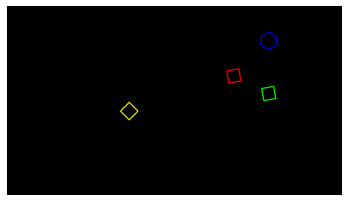

In [47]:
# Your code here.
img = np.zeros((conveyor_f100.shape[0],conveyor_f100.shape[1],conveyor_f100.shape[2]))

imgn3 = cv.bitwise_not(img3)

ret3,th3 = cv.threshold(img3,100,255,cv.THRESH_BINARY_INV)
contours3, hierarchy3 = cv.findContours(th3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

cv.drawContours(img, [contours3[0]], 0, (127,127,0), 5)
cv.drawContours(img, [contours3[1]], 0, (0,255,0), 5)
cv.drawContours(img, [contours3[2]], 0, (255,0,0), 5)
cv.drawContours(img, [contours3[3]], 0, (0,0,255), 5)

fig,ax = plt.subplots()

ax.imshow(img)
ax.axis('off')

# Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

1. Open the sequence and play it using the code below.

In [7]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


2. Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function to match contours in each frame with that in the template.

In [8]:
# Your code here.
contours1 ,hierarchy = cv.findContours(th1,2,1)
cnt1 = contours1[0]

contours2 ,hierarchy = cv.findContours(th2,2,1)
cnt2 = contours2[0]

contours3 ,hierarchy = cv.findContours(th3,2,1)
cnt3 = contours3[0]

ret1 = cv.matchShapes(cnt1,cnt3,1,0.0)
print(ret1)
ret2 = cv.matchShapes(cnt2,cnt3,1,0.0)
print(ret2)

1.8762769116165146e-13
1.8762769116165146e-13


3. Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.

In [9]:
# Yor code here.


# Writing the video

frame_array = []
shape = (1080, 1920, 3)

# Your code here.


out = cv.VideoWriter('./conveyor_result_indexno.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()